### Objective:

The Objective of this assignment is to analyze the factors that lead to loan defaults among applicants within the German lending landscape. We analyze German Credit Risk dataset that captures various details of loan applicants and their credit histories to establish contribution of these factors to likelihood of loan default and credit risk assessment. The objective of this analysis is to construct predictive models that help in identifying potential defaults. 

### German Credit Risk Data

**About dataset**\
The dataset consists of following columns
1. **checking_balance**           : Amount of money available in account of customers
2. **months_loan_duration**       : Duration since loan taken
3. **credit_history**             : credit history of each customers 
4. **purpose**                    : Purpose why loan has been taken
5. **amount**                     : Amount of loan taken
6. **savings_balance**            : Balance in account
7. **employment_duration**        : Duration of employment
8. **percent_of_income**          : Percentage of monthly income
9. **years_at_residence**         : Duration of current residence
10. **age**                       : Age of customer
11. **other_credit**              : Any other credits taken
12. **housing**                   : Type of housing, rent or own
13. **existing_loans_count**      : Existing count of loans
14. **job**                       : Job type
15. **dependents**                : Any dependents on customer
16. **phone**                     : Having phone or not
17. **default**                   : Default status (Target column)

#### Read, explore, and clean data

In [3]:
#install libraries
import pandas as pd
import pickle

#### Data preparation

In [5]:
%run data_preparation.ipynb

In [6]:
#load data
df = read_data('C:\Jasmine\GreatLearning\ML\project\GermanBankLoan\german-bank-loan-defaults\src\data\credit.csv')

In [7]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


#### Explore Data

Perform Exploratory Data Analysis
- Uderstand statistics summary
- Descibe numerical data
- Describe categorical data


In [8]:
summary = explore_data(df)
print(summary)

{'shape': (1000, 17), 'types': checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object, 'numeric_summary':        months_loan_duration        amount  percent_of_income   
count           1000.000000   1000.000000        1000.000000  \
mean              20.903000   3271.258000           2.973000   
std               12.058814   2822.736876           1.118715   
min                4.000000    250.000000           1.000000   
25%               12.000000   1365.500000           2.000000   
50%               18.000

#### Clean Data

In [9]:
df = clean_data(df)

In [10]:
df.isnull().sum()

checking_balance        394
months_loan_duration      0
credit_history            0
purpose                   0
amount                    0
savings_balance         183
employment_duration       0
percent_of_income         0
years_at_residence        0
age                       0
other_credit              0
housing                   0
existing_loans_count      0
job                       0
dependents                0
phone                     0
default                   0
dtype: int64

#### Data Manipulation, Wrangling and Visualization

##### checking_balance : From Above statistics, we can see that checking_balance have null values and should be imputed with missing values in the column using a random sampling approach based on the distribution of non-missing values.

In [11]:
%run data_manipulation.ipynb

Categorical Feature Distribution

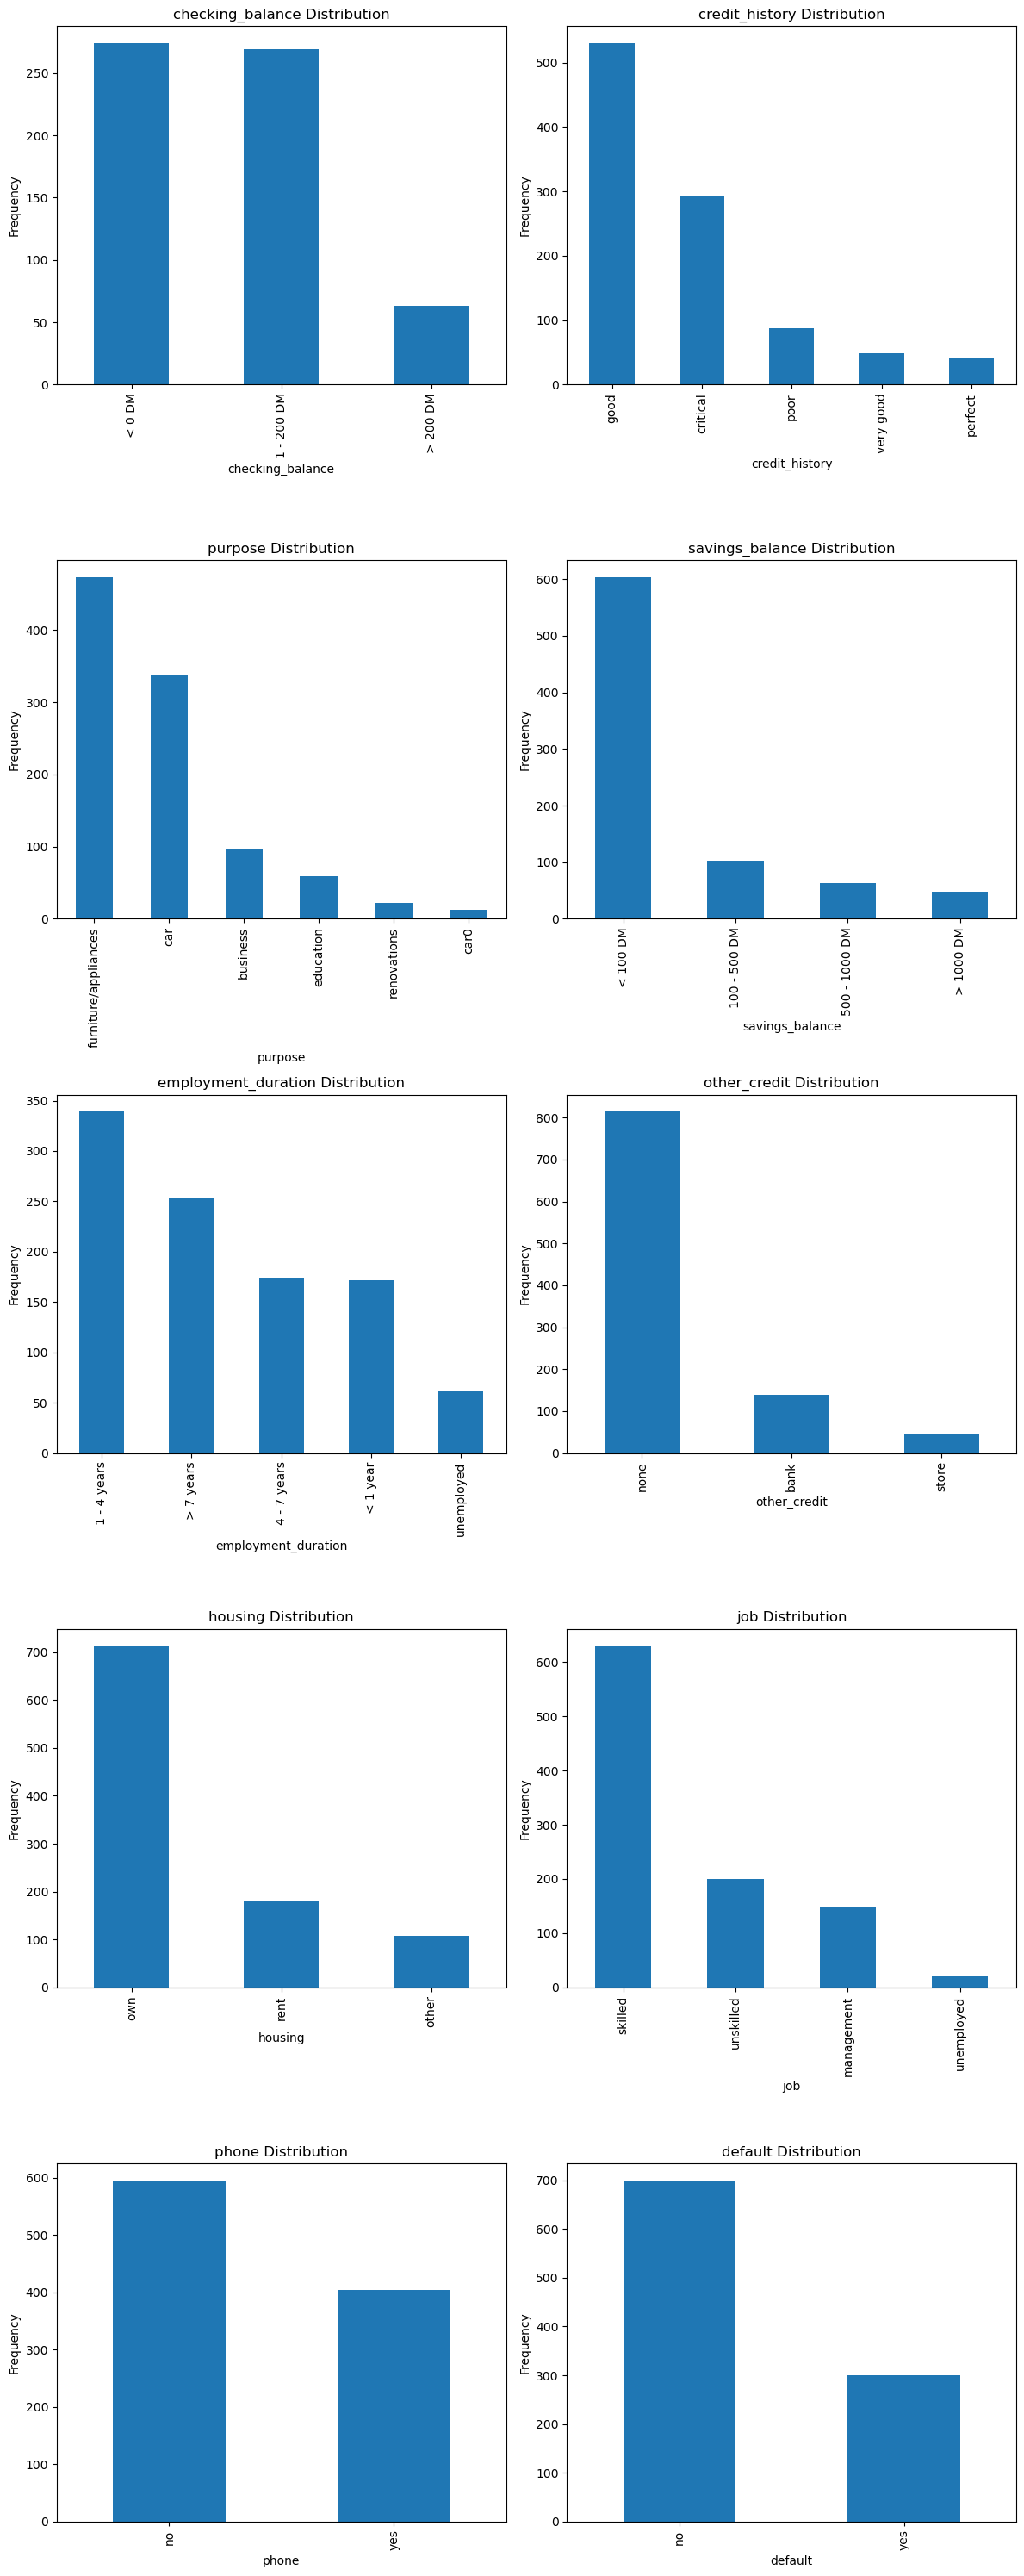

In [12]:
#list of categorical features
categorical_features = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration',
                        'other_credit', 'housing', 'job', 'phone', 'default']
feature_distribution(df,categorical_features)

Visualization : Numeric Feature Distribution

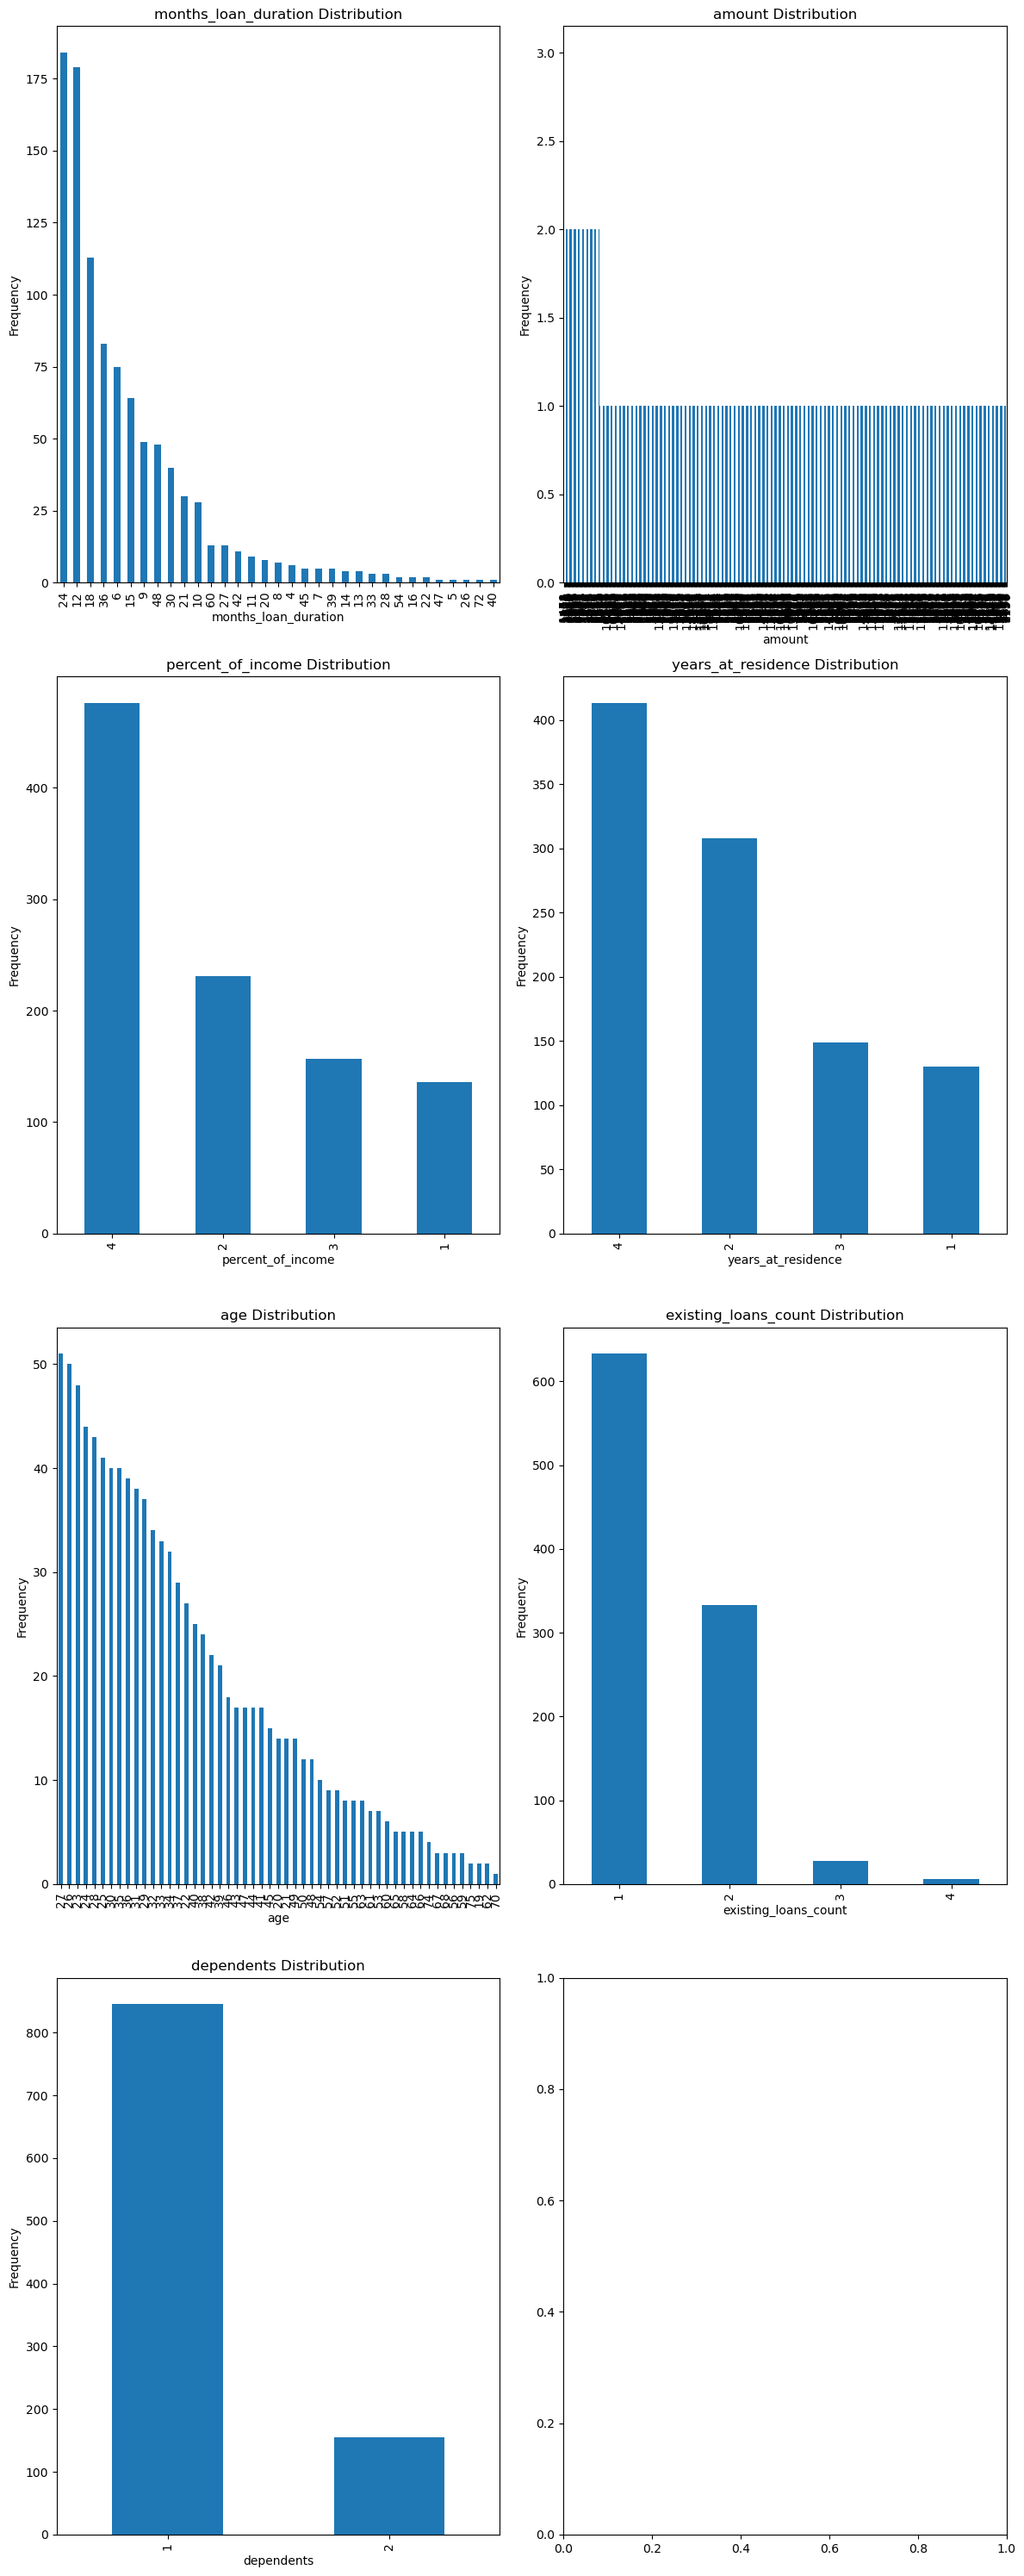

In [13]:
numeric_features = ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age','existing_loans_count','dependents']
feature_distribution(df,numeric_features)

In [14]:
df = impute_missing_data(df,'checking_balance')

Original value_counts:
 checking_balance
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64


Distribution:
 checking_balance
< 0 DM        0.452145
1 - 200 DM    0.443894
> 200 DM      0.103960
Name: proportion, dtype: float64


Value_counts after imputation:
 checking_balance
< 0 DM        453
1 - 200 DM    445
> 200 DM      102
Name: count, dtype: int64




##### savings_balance : From Above statistics, we can see that savings_balance have null values and should be imputed with missing values in the column using a random sampling approach based on the distribution of non-missing values.

In [15]:
df = impute_missing_data(df,'savings_balance')

Original value_counts:
 savings_balance
< 100 DM         603
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64


Distribution:
 savings_balance
< 100 DM         0.738066
100 - 500 DM     0.126071
500 - 1000 DM    0.077111
> 1000 DM        0.058752
Name: proportion, dtype: float64


Value_counts after imputation:
 savings_balance
< 100 DM         741
100 - 500 DM     121
500 - 1000 DM     81
> 1000 DM         57
Name: count, dtype: int64




purpose : Merge car0 to car as there are only 12 records

In [16]:
df = merge_categories(df,'purpose','car0','car')

purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64


purpose
furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: count, dtype: int64


Indentify relationship between categorical predictors and target variable default

#### Ordinal Encoding

In [17]:
# List of categorical columns and their respective categories
categorical_columns = ['checking_balance', 'savings_balance', 'employment_duration', 'job']
categories_list = [
    ['< 0 DM', '1 - 200 DM', '> 200 DM'],
    ['< 100 DM', '100 - 500 DM', '500 - 1000 DM', '> 1000 DM'],
    ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years'],
    ['unemployed', 'unskilled', 'skilled', 'management']
]

# Call the function to perform ordinal encoding
df = perform_ordinal_encoding(df, categorical_columns, categories_list)

# Display the updated DataFrame
print(df.head())

  checking_balance  months_loan_duration credit_history               purpose   
0           < 0 DM                     6       critical  furniture/appliances  \
1       1 - 200 DM                    48           good  furniture/appliances   
2       1 - 200 DM                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income   
0    1169        < 100 DM           > 7 years                  4  \
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age  ... housing existing_loans_count        job   
0                   4   67  .

#### Label Encoding

In [18]:
columns_to_encode = ['credit_history','purpose','other_credit','housing','phone','default']
df = perform_label_encoding(df, columns_to_encode)
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,...,housing,existing_loans_count,job,dependents,phone,default,checking_balance_encoded,savings_balance_encoded,employment_duration_encoded,job_encoded
0,< 0 DM,6,0,3,1169,< 100 DM,> 7 years,4,4,67,...,1,2,skilled,1,1,0,0.0,0.0,4.0,2.0
1,1 - 200 DM,48,1,3,5951,< 100 DM,1 - 4 years,2,2,22,...,1,1,skilled,1,0,1,1.0,0.0,2.0,2.0
2,1 - 200 DM,12,0,2,2096,< 100 DM,4 - 7 years,2,3,49,...,1,1,unskilled,2,0,0,1.0,0.0,3.0,1.0
3,< 0 DM,42,1,3,7882,< 100 DM,4 - 7 years,2,4,45,...,0,1,skilled,2,0,0,0.0,0.0,3.0,2.0
4,< 0 DM,24,3,1,4870,< 100 DM,1 - 4 years,3,4,53,...,0,2,skilled,2,0,1,0.0,0.0,2.0,2.0


Relation betweem categorical predictor to target variable default

C:\Users\vgjma\AppData\Local\Temp\ipykernel_24180\1144081054.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default', data=df, ci=None)
C:\Users\vgjma\AppData\Local\Temp\ipykernel_24180\1144081054.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default', data=df, ci=None)
C:\Users\vgjma\AppData\Local\Temp\ipykernel_24180\1144081054.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default', data=df, ci=None)
C:\Users\vgjma\AppData\Local\Temp\ipykernel_24180\1144081054.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default', data=df, ci=None)
C:\Users\vgjma\AppData\Local\Temp\ipykernel_24180\1144081054.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same e

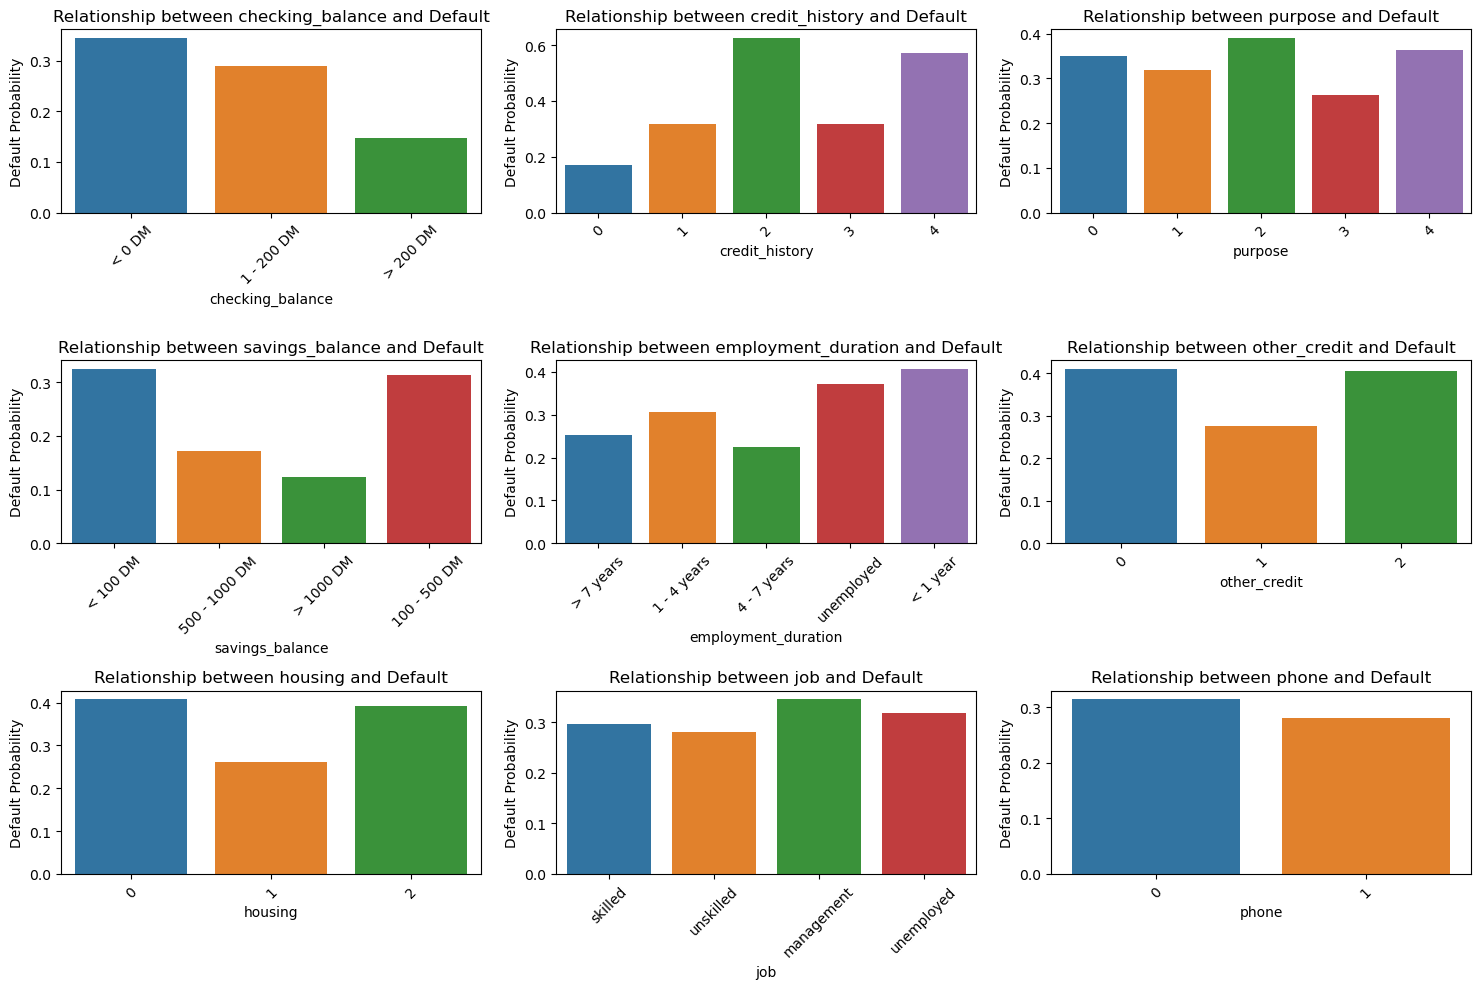

OSError: [Errno 22] Invalid argument: 'C:\\Jasmine\\GreatLearning\\ML\\project\\GermanBankLoan\\german-bank-loan-defaults\reports\x0cigures\\CategoricalFeaturesRelationToTarget.png'

<Figure size 640x480 with 0 Axes>

In [19]:
categorical_columns = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone']

categorical_predictors_to_target(df, categorical_columns)


Relation betweem numeric predictor to target variable default

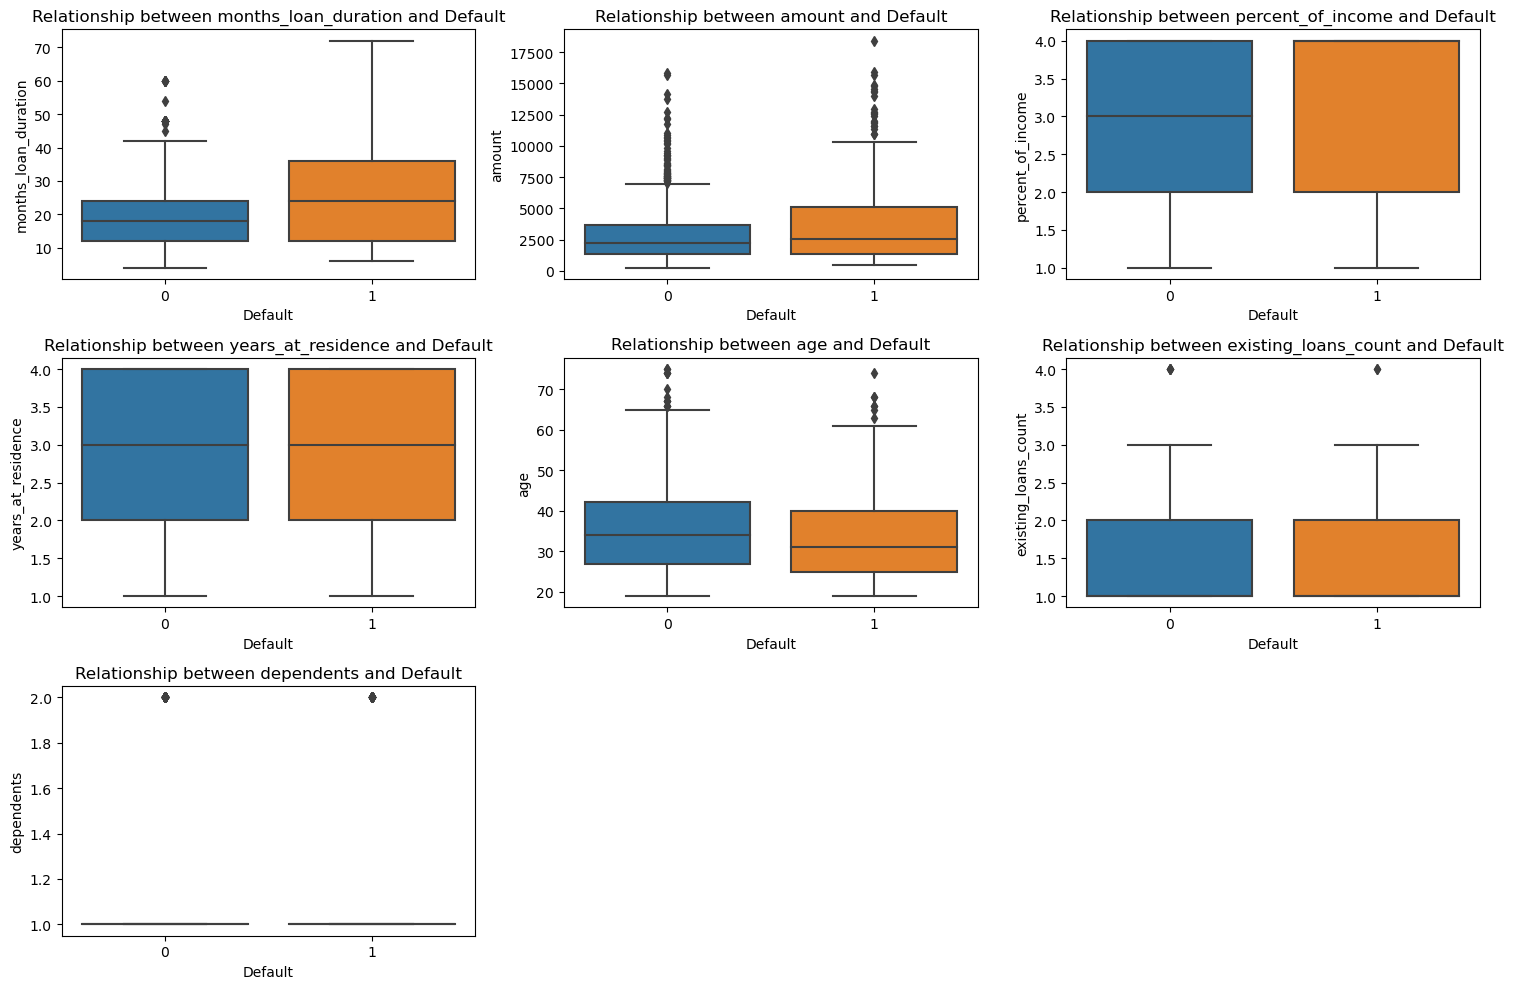

In [92]:
numeric_features = ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age','existing_loans_count','dependents']
numeric_predictors_to_target(df, numeric_features)

In [20]:
#drop original categorical columns without encoding and target from X 
drop_columns = ['default','checking_balance','savings_balance','employment_duration','job']
X = df.drop(columns = drop_columns)
y = df['default']

Perform Random Oversampling to improve recall

In [21]:
# Example usage
X_resampled, y_resampled = perform_random_oversampling(X, y)

Class counts before oversampling: [700 300]
Class counts after oversampling: [700 700]


#### Run Models

In [41]:
%run modeling.ipynb

Train Gradient Boosting Model and run prediction

months_loan_duration: 0.12075479290252442
credit_history: 0.13843510209901763
purpose: 0.057098926438619295
amount: 0.24640055906872643
percent_of_income: 0.02049149119366644
years_at_residence: 0.02646748093520459
age: 0.12363347410975963
other_credit: 0.03988570431209912
housing: 0.04291971603546712
existing_loans_count: 0.017276178970218943
dependents: 0.008065263623433062
phone: 0.012838895765992654
checking_balance_encoded: 0.06189779438614293
savings_balance_encoded: 0.02635753008762388
employment_duration_encoded: 0.04380032597195425
job_encoded: 0.013676764099549642


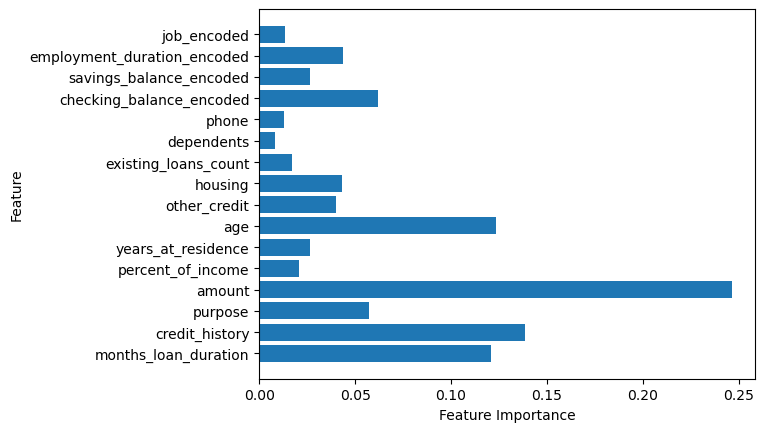

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       141
           1       0.52      0.25      0.34        59

    accuracy                           0.71       200
   macro avg       0.63      0.58      0.58       200
weighted avg       0.68      0.71      0.67       200



In [46]:
# Example usage
gbc = GradientBoostingClassifier()
gbc_report = train_evaluate_model(gbc, X, y)

In above results, if we observe recall for default is 25% which means only 25% of true defaults will be predicted by this model. The reason behind that is the records with default=1 (300) are significantly less than default=0 (700). so, we will use oversampling technique to get equal importance to default=1 to get better recall values in below models. We have already calculated X_resampled and y_resmpled in earlier code, we will use that in following models to get better recall. 

months_loan_duration: 0.13215867083038518
credit_history: 0.14257671771593208
purpose: 0.034913832953965114
amount: 0.18037365921342438
percent_of_income: 0.035677633692493674
years_at_residence: 0.022667888517461973
age: 0.14806229347644997
other_credit: 0.037438728936918325
housing: 0.05242557190119708
existing_loans_count: 0.01961354383781184
dependents: 0.004500133292840614
phone: 0.011167557869287326
checking_balance_encoded: 0.05024427416265988
savings_balance_encoded: 0.06245711478328162
employment_duration_encoded: 0.058704164984619084
job_encoded: 0.0070182138312719035


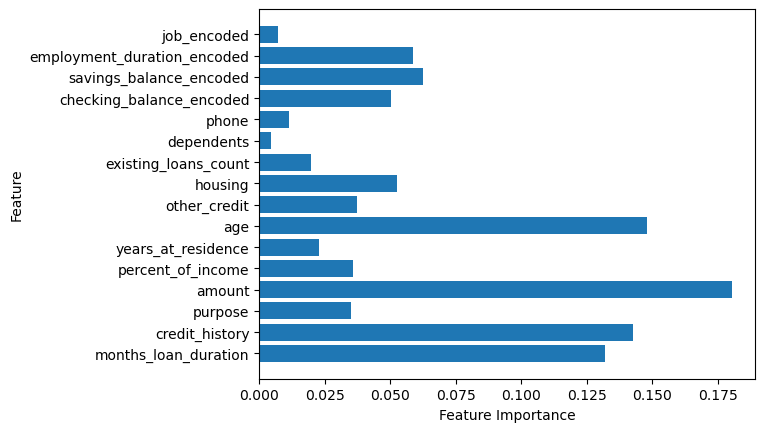

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       149
           1       0.69      0.82      0.75       131

    accuracy                           0.75       280
   macro avg       0.75      0.75      0.75       280
weighted avg       0.76      0.75      0.75       280



In [23]:
# Example usage
gbc = GradientBoostingClassifier()
gbc_report = train_evaluate_model(gbc, X_resampled, y_resampled)

In [24]:
# Save the trained model to a file
with open('C:\Jasmine\GreatLearning\ML\project\GermanBankLoan\german-bank-loan-defaults\models\gradientboosting_model.pkl', 'wb') as file:
    pickle.dump(gbc, file)

HyperParameter Tuning for Gradient Boosting

In [25]:
gbc_fine_tuned_report = tune_boosting_hyperparameters(gbc, X_resampled, y_resampled)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400}
Train Score: 0.8133928571428573
Test Score: 0.8535714285714285
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       149
           1       0.79      0.93      0.86       131

    accuracy                           0.85       280
   macro avg       0.86      0.86      0.85       280
weighted avg       0.86      0.85      0.85       280



Train Bagging Model and run prediction

In [26]:
bc=BaggingClassifier(random_state=1)
bc_report = train_evaluate_model(bc, X_resampled, y_resampled)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       149
           1       0.76      0.90      0.83       131

    accuracy                           0.82       280
   macro avg       0.83      0.83      0.82       280
weighted avg       0.83      0.82      0.82       280



In [27]:
# Save the trained model to a file
with open('C:/Jasmine/GreatLearning/ML/project/GermanBankLoan/german-bank-loan-defaults/models/baggingclassifier_model.pkl', 'wb') as file:
    pickle.dump(bc, file)

HyperParameter Tuning for Bagging Classifier

In [28]:
fine_tune_bc_report = tune_bagging_classifier(X_resampled, y_resampled)

C:\Users\vgjma\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\vgjma\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\vgjma\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\vgjma\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\vgjma\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\vgjma\anaconda3\lib\site-p

Best Parameters: {'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       149
           1       0.82      0.92      0.86       131

    accuracy                           0.86       280
   macro avg       0.87      0.87      0.86       280
weighted avg       0.87      0.86      0.86       280



Train Random Forest Model and run prediction

In [29]:
rc = RandomForestClassifier(random_state=1)
rc_report = train_evaluate_model(bc, X_resampled, y_resampled)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       149
           1       0.76      0.90      0.83       131

    accuracy                           0.82       280
   macro avg       0.83      0.83      0.82       280
weighted avg       0.83      0.82      0.82       280



HyperParameter Tuning for Random forest

In [30]:
rc = RandomForestClassifier(random_state=1)
rc_report = train_evaluate_model(bc, X_resampled, y_resampled)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       149
           1       0.76      0.90      0.83       131

    accuracy                           0.82       280
   macro avg       0.83      0.83      0.82       280
weighted avg       0.83      0.82      0.82       280



In [31]:
# Save the trained model to a file
with open('C:/Jasmine/GreatLearning/ML/project/GermanBankLoan/german-bank-loan-defaults/models/randomforest_model.pkl', 'wb') as file:
    pickle.dump(rc, file)

Train XGBoost Model and run prediction

In [32]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_report = train_evaluate_model(bc, X_resampled, y_resampled)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       149
           1       0.76      0.90      0.83       131

    accuracy                           0.82       280
   macro avg       0.83      0.83      0.82       280
weighted avg       0.83      0.82      0.82       280



In [33]:
# Save the trained model to a file
with open('C:/Jasmine/GreatLearning/ML/project/GermanBankLoan/german-bank-loan-defaults/models/xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

HyperParameter Tuning for XGBoost

In [34]:
fine_tune_xgboost_report = tune_boosting_hyperparameters(xgb, X_resampled, y_resampled)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Train Score: 0.81875
Test Score: 0.8321428571428572
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       149
           1       0.76      0.93      0.84       131

    accuracy                           0.83       280
   macro avg       0.84      0.84      0.83       280
weighted avg       0.85      0.83      0.83       280



Train SVM and run prediction

In [35]:
svc = SVC(probability=True)
svc_report = train_evaluate_model(bc, X_resampled, y_resampled)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       149
           1       0.76      0.90      0.83       131

    accuracy                           0.82       280
   macro avg       0.83      0.83      0.82       280
weighted avg       0.83      0.82      0.82       280



In [36]:
# Save the trained model to a file
with open('C:/Jasmine/GreatLearning/ML/project/GermanBankLoan/german-bank-loan-defaults/models/svm_model.pkl', 'wb') as file:
    pickle.dump(svc, file)

Train Voting Classifier and run prediction

In [42]:
#Voting Classifier for soft voting
voting = 'soft'
voting_clf_report = train_voting_classifier(gbc,bc,rc,xgb,svc,X,y,voting)

              precision    recall  f1-score   support

           0       0.74      0.91      0.81       141
           1       0.50      0.22      0.31        59

    accuracy                           0.70       200
   macro avg       0.62      0.56      0.56       200
weighted avg       0.67      0.70      0.66       200



In [43]:
#Voting Classifier for hard voting
voting = 'hard'
voting_clf_report_hard = train_voting_classifier(gbc,bc,rc,xgb,svc,X,y,voting)

              precision    recall  f1-score   support

           0       0.72      0.91      0.81       141
           1       0.45      0.17      0.25        59

    accuracy                           0.69       200
   macro avg       0.59      0.54      0.53       200
weighted avg       0.65      0.69      0.64       200



In [44]:
from sklearn.metrics import classification_report

# Create a dictionary to hold the reports
model_reports = {
    'Random Forest Classifier': rc_report,
    'Voting Classifier Hard' : voting_clf_report_hard,
    'Voting Classifier Soft' : voting_clf_report,
    'SVC Classifier' : svc_report,
    'xgb classifier' : xgb_report,
    'Bagging Classifier' : bc_report,
    'Gradient Boosting Classifier' : gbc_report,

}

# Compare models based on recall

comparison_metric = 'recall'

best_model_name = None
best_metric_value = -1  # Initialize with a value lower than any possible metric

for model_name, report in model_reports.items():
    #print(model_name, report)
    metric_value = report['1'][comparison_metric]  # Access the desired metric for the positive class
    print(model_name, metric_value)
    if metric_value > best_metric_value:
        best_metric_value = metric_value
        best_model_name = model_name

print(f"The best model based on {comparison_metric} is: {best_model_name} with recall {best_metric_value}")




Random Forest Classifier 0.9007633587786259
Voting Classifier Hard 0.1694915254237288
Voting Classifier Soft 0.22033898305084745
SVC Classifier 0.9007633587786259
xgb classifier 0.9007633587786259
Bagging Classifier 0.9007633587786259
Gradient Boosting Classifier 0.816793893129771
The best model based on recall is: Random Forest Classifier with recall 0.9007633587786259


Recall comparison with Hyperparameter tuning for models XGBoost, Bagging, Gradient Boosting

In [45]:
from sklearn.metrics import classification_report

# Create a dictionary to hold the reports
model_reports = {
    'Fine Tuned XGBoost Classifier' : fine_tune_xgboost_report,
    'Fine Tuned Bagging Classifer' : fine_tune_bc_report,
    'Fine Tuned Gradient Boosting Classifier' : gbc_fine_tuned_report

}

# Compare models based on recall

comparison_metric = 'recall'

best_model_name = None
best_metric_value = -1  # Initialize with a value lower than any possible metric

for model_name, report in model_reports.items():
    #print(model_name, report)
    metric_value = report['1'][comparison_metric]  # Access the desired metric for the positive class
    print(model_name, metric_value)
    if metric_value > best_metric_value:
        best_metric_value = metric_value
        best_model_name = model_name

print(f"The best model based on {comparison_metric} is: {best_model_name} with recall {best_metric_value}")




Fine Tuned XGBoost Classifier 0.9312977099236641
Fine Tuned Bagging Classifer 0.916030534351145
Fine Tuned Gradient Boosting Classifier 0.9312977099236641
The best model based on recall is: Fine Tuned XGBoost Classifier with recall 0.9312977099236641
